<a href="https://colab.research.google.com/github/MrVee07/Projects/blob/master/Stock%20Market%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import datetime

In [2]:
!pip install pandas-datareader
import pandas_datareader as web

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
company = "FB" #ticker symbol for a company (e.g. FB for Facebook)
start = datetime.datetime(2012, 1, 1) #starting date for dataset
end = datetime.datetime(2022, 1, 1) #ending date for dataset


In [5]:

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
df = web.DataReader(company, 'yahoo', start, end) #fetching data from yahoo finance api


In [8]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-08,344.790009,338.339996,344.420013,338.619995,18342500,338.619995
2021-11-09,341.309998,334.470001,340.000000,335.369995,17556700,335.369995
2021-11-10,333.190002,325.510010,332.489990,327.640015,21872600,327.640015
2021-11-11,332.459991,327.000000,329.820007,327.739990,12376600,327.739990
2021-11-12,341.859985,329.779999,330.179993,340.890015,25414300,340.890015
...,...,...,...,...,...,...
2022-11-01,97.489998,93.550003,94.330002,95.199997,110189600,95.199997
2022-11-02,95.199997,90.480003,94.209999,90.540001,71821100,90.540001
2022-11-03,90.459999,88.410004,90.080002,88.910004,60664000,88.910004


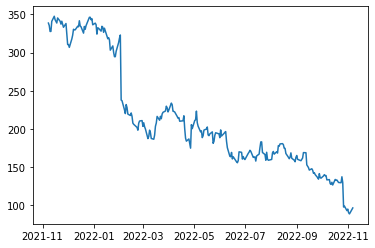

In [9]:
plt.plot(df.index, df["Close"]) #we are only interested in closing price

In [10]:
#Scaling all data in 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1,1)) #reshape is necessary because fit_transform only accept 2d array
scaled_data

array([[0.96543591],
       [0.95287066],
       [0.92298479],
       [0.92337132],
       [0.97421232],
       [1.        ],
       [0.98221532],
       [0.97374827],
       [0.96570657],
       [0.99126229],
       [0.97467625],
       [0.96013919],
       [0.97486951],
       [0.94417165],
       [0.96315485],
       [0.9106901 ],
       [0.85710422],
       [0.85629235],
       [0.84256717],
       [0.88521166],
       [0.90431084],
       [0.93427411],
       [0.93141314],
       [0.93114248],
       [0.94946836],
       [0.94656869],
       [0.97718927],
       [0.95105353],
       [0.94676207],
       [0.91451774],
       [0.94834724],
       [0.93384889],
       [0.95236804],
       [0.99466459],
       [0.99481927],
       [0.98213804],
       [0.98762802],
       [0.95665961],
       [0.96512666],
       [0.9573555 ],
       [0.90956897],
       [0.94161992],
       [0.93902962],
       [0.92464724],
       [0.94900444],
       [0.94471298],
       [0.91849995],
       [0.939

In [11]:
df["Close"].values

array([338.61999512, 335.36999512, 327.64001465, 327.73999023,
       340.89001465, 347.55999756, 342.95999146, 340.76998901,
       338.69000244, 345.29998779, 341.01000977, 337.25      ,
       341.05999756, 333.11999512, 338.02999878, 324.45999146,
       310.6000061 , 310.39001465, 306.83999634, 317.86999512,
       322.80999756, 330.55999756, 329.82000732, 329.75      ,
       334.48999023, 333.73999023, 341.66000366, 334.8999939 ,
       333.79000854, 325.45001221, 334.20001221, 330.45001221,
       335.23999023, 346.17999268, 346.22000122, 342.94000244,
       344.35998535, 336.3500061 , 338.54000854, 336.52999878,
       324.17001343, 332.45999146, 331.79000854, 328.07000732,
       334.36999512, 333.26000977, 326.48001099, 331.8999939 ,
       318.1499939 , 319.58999634, 316.55999756, 303.17001343,
       308.70999146, 300.1499939 , 294.63000488, 294.64001465,
       301.70999146, 313.26000977, 319.        , 323.        ,
       237.75999451, 237.08999634, 224.91000366, 220.17

In [12]:
df["Close"].values.reshape(-1,1)

array([[338.61999512],
       [335.36999512],
       [327.64001465],
       [327.73999023],
       [340.89001465],
       [347.55999756],
       [342.95999146],
       [340.76998901],
       [338.69000244],
       [345.29998779],
       [341.01000977],
       [337.25      ],
       [341.05999756],
       [333.11999512],
       [338.02999878],
       [324.45999146],
       [310.6000061 ],
       [310.39001465],
       [306.83999634],
       [317.86999512],
       [322.80999756],
       [330.55999756],
       [329.82000732],
       [329.75      ],
       [334.48999023],
       [333.73999023],
       [341.66000366],
       [334.8999939 ],
       [333.79000854],
       [325.45001221],
       [334.20001221],
       [330.45001221],
       [335.23999023],
       [346.17999268],
       [346.22000122],
       [342.94000244],
       [344.35998535],
       [336.3500061 ],
       [338.54000854],
       [336.52999878],
       [324.17001343],
       [332.45999146],
       [331.79000854],
       [328

In [13]:
pred_days = 60 #number of days you want to predict, to measure accuracy of model

In [14]:
X_train, y_train = [], []

In [15]:
#As we are gonna use LSTM and sequential modelling for prediction,
#we will provide first 60 closing price in first input of X_train
#and this first input(i.e, first array of 60 days closing price) will have 61th day's closing price as it's corresponding output 
#then next input will be 2nd day closing price to 61th day closing price and it's corresponding output will be 62th day's closing price

for x in range(pred_days, len(scaled_data)):
    X_train.append(scaled_data[x-pred_days:x,0])
    y_train.append(scaled_data[x,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
print(X_train.shape)
X_train

(192, 60)


array([[0.96543591, 0.95287066, 0.92298479, ..., 0.86738841, 0.88958052,
        0.90504544],
       [0.95287066, 0.92298479, 0.92337132, ..., 0.88958052, 0.90504544,
        0.57548809],
       [0.92298479, 0.92337132, 0.97421232, ..., 0.90504544, 0.57548809,
        0.57289772],
       ...,
       [0.34575679, 0.34247054, 0.35410786, ..., 0.01643147, 0.02431855,
        0.00630194],
       [0.34247054, 0.35410786, 0.35561569, ..., 0.02431855, 0.00630194,
        0.        ],
       [0.35410786, 0.35561569, 0.35012565, ..., 0.00630194, 0.        ,
        0.0072685 ]])

In [17]:
print(y_train.shape) #notice first output of y_train and last input of 2nd array in X_train
y_train

(192,)


array([0.57548809, 0.57289772, 0.52580709, 0.50751978, 0.55321863,
       0.53802438, 0.5050841 , 0.49793155, 0.51069012, 0.49344671,
       0.45930797, 0.4533153 , 0.43754108, 0.42350665, 0.45888268,
       0.47001738, 0.47214382, 0.44299248, 0.46085444, 0.44098202,
       0.42973128, 0.38105548, 0.39195821, 0.42369998, 0.41098011,
       0.38159675, 0.37780786, 0.39868547, 0.44353375, 0.45981054,
       0.49325345, 0.47392231, 0.493872  , 0.48153878, 0.50516144,
       0.51386046, 0.52070364, 0.54494491, 0.53717381, 0.51594819,
       0.52557512, 0.5605258 , 0.55260002, 0.51958246, 0.51822925,
       0.51583221, 0.49313747, 0.48416779, 0.48745411, 0.4688575 ,
       0.47113862, 0.49642373, 0.43112313, 0.38337524, 0.36806495,
       0.37919971, 0.35584765, 0.33265028, 0.45165279, 0.43131645,
       0.47253046, 0.47601004, 0.52000774, 0.46151169, 0.44407502,
       0.41484634, 0.42041366, 0.38596561, 0.39563118, 0.42416391,
       0.42965394, 0.43962882, 0.39949741, 0.39582444, 0.40452

In [18]:
X_train.shape

(192, 60)

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape) #adding one more dimension to X_train
X_train

(192, 60, 1)


array([[[0.96543591],
        [0.95287066],
        [0.92298479],
        ...,
        [0.86738841],
        [0.88958052],
        [0.90504544]],

       [[0.95287066],
        [0.92298479],
        [0.92337132],
        ...,
        [0.88958052],
        [0.90504544],
        [0.57548809]],

       [[0.92298479],
        [0.92337132],
        [0.97421232],
        ...,
        [0.90504544],
        [0.57548809],
        [0.57289772]],

       ...,

       [[0.34575679],
        [0.34247054],
        [0.35410786],
        ...,
        [0.01643147],
        [0.02431855],
        [0.00630194]],

       [[0.34247054],
        [0.35410786],
        [0.35561569],
        ...,
        [0.02431855],
        [0.00630194],
        [0.        ]],

       [[0.35410786],
        [0.35561569],
        [0.35012565],
        ...,
        [0.00630194],
        [0.        ],
        [0.0072685 ]]])

In [20]:
# Building Neural Network model

In [21]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1)) #prediction of next day's closing price

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
6/6 [==============================] - 6s 75ms/step - loss: 0.0451
Epoch 2/25
6/6 [==============================] - 0s 75ms/step - loss: 0.0097
Epoch 3/25
6/6 [==============================] - 0s 70ms/step - loss: 0.0083
Epoch 4/25
6/6 [==============================] - 0s 74ms/step - loss: 0.0075
Epoch 5/25
6/6 [==============================] - 0s 70ms/step - loss: 0.0067
Epoch 6/25
6/6 [==============================] - 0s 73ms/step - loss: 0.0067
Epoch 7/25
6/6 [==============================] - 0s 72ms/step - loss: 0.0069
Epoch 8/25
6/6 [==============================] - 0s 73ms/step - loss: 0.0059
Epoch 9/25
6/6 [==============================] - 0s 72ms/step - loss: 0.0064
Epoch 10/25
6/6 [==============================] - 0s 71ms/step - loss: 0.0057
Epoch 11/25
6/6 [==============================] - 0s 73ms/step - loss: 0.0061
Epoch 12/25
6/6 [==============================] - 0s 70ms/step - loss: 0.0052
Epoch 13/25
6/6 [==============================] - 0s 74ms/st

In [25]:
# Testing model accuracy on existing data

In [26]:
#loading test data
test_start = datetime.datetime(2022,1,1)
test_end = datetime.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - pred_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

model_inputs

array([[0.35561569],
       [0.35012565],
       [0.33226369],
       [0.3315291 ],
       [0.30562538],
       [0.28664218],
       [0.27914169],
       [0.28745406],
       [0.30879566],
       [0.28173206],
       [0.2716412 ],
       [0.2638701 ],
       [0.2861782 ],
       [0.29557316],
       [0.2760874 ],
       [0.26920546],
       [0.276358  ],
       [0.2828146 ],
       [0.31022614],
       [0.30949161],
       [0.2482892 ],
       [0.24187125],
       [0.2344481 ],
       [0.22184416],
       [0.22853277],
       [0.22107092],
       [0.20572199],
       [0.2084284 ],
       [0.19911077],
       [0.18349118],
       [0.1758747 ],
       [0.20375023],
       [0.18364586],
       [0.18082347],
       [0.19215155],
       [0.19860814],
       [0.19358203],
       [0.19393004],
       [0.1722018 ],
       [0.1735163 ],
       [0.1532186 ],
       [0.14919775],
       [0.1599845 ],
       [0.14633675],
       [0.17448286],
       [0.16968877],
       [0.17135122],
       [0.164

In [27]:
# Making predictions on testing data
X_test = []

for x in range(pred_days, len(model_inputs)):
    X_test.append(model_inputs[x-pred_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.35561569],
        [0.35012565],
        [0.33226369],
        ...,
        [0.        ],
        [0.0072685 ],
        [0.03019524]],

       [[0.35012565],
        [0.33226369],
        [0.3315291 ],
        ...,
        [0.0072685 ],
        [0.03019524],
        [0.96543591]],

       [[0.33226369],
        [0.3315291 ],
        [0.30562538],
        ...,
        [0.03019524],
        [0.96543591],
        [0.95287066]],

       ...,

       [[0.34575679],
        [0.34247054],
        [0.35410786],
        ...,
        [0.01643147],
        [0.02431855],
        [0.00630194]],

       [[0.34247054],
        [0.35410786],
        [0.35561569],
        ...,
        [0.02431855],
        [0.00630194],
        [0.        ]],

       [[0.35410786],
        [0.35561569],
        [0.35012565],
        ...,
        [0.00630194],
        [0.        ],
        [0.0072685 ]]])

In [28]:
# Making predictions on testing data
X_test = []

for x in range(pred_days, len(model_inputs)):
    X_test.append(model_inputs[x-pred_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.35561569],
        [0.35012565],
        [0.33226369],
        ...,
        [0.        ],
        [0.0072685 ],
        [0.03019524]],

       [[0.35012565],
        [0.33226369],
        [0.3315291 ],
        ...,
        [0.0072685 ],
        [0.03019524],
        [0.96543591]],

       [[0.33226369],
        [0.3315291 ],
        [0.30562538],
        ...,
        [0.03019524],
        [0.96543591],
        [0.95287066]],

       ...,

       [[0.34575679],
        [0.34247054],
        [0.35410786],
        ...,
        [0.01643147],
        [0.02431855],
        [0.00630194]],

       [[0.34247054],
        [0.35410786],
        [0.35561569],
        ...,
        [0.02431855],
        [0.00630194],
        [0.        ]],

       [[0.35410786],
        [0.35561569],
        [0.35012565],
        ...,
        [0.00630194],
        [0.        ],
        [0.0072685 ]]])

In [29]:
predicted_prices = model.predict(X_test)
predicted_prices

8/8 [==============================] - 2s 23ms/step


array([[0.06894004],
       [0.06569312],
       [0.07631336],
       [0.10114145],
       [0.13826828],
       [0.18502891],
       [0.23822208],
       [0.2942685 ],
       [0.34996495],
       [0.40278295],
       [0.45124915],
       [0.49430895],
       [0.5314273 ],
       [0.5627379 ],
       [0.5883738 ],
       [0.6089941 ],
       [0.62485987],
       [0.63617444],
       [0.64357704],
       [0.64770514],
       [0.6496237 ],
       [0.6502103 ],
       [0.6502677 ],
       [0.6501808 ],
       [0.6501524 ],
       [0.65040886],
       [0.6509585 ],
       [0.65199465],
       [0.6532674 ],
       [0.65460765],
       [0.6556557 ],
       [0.6565777 ],
       [0.65728986],
       [0.65794015],
       [0.6588942 ],
       [0.66020006],
       [0.66170806],
       [0.6633496 ],
       [0.66479504],
       [0.6660041 ],
       [0.66689664],
       [0.66711146],
       [0.6668925 ],
       [0.66635084],
       [0.6654916 ],
       [0.66458756],
       [0.6637185 ],
       [0.662

In [30]:
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices

array([[106.74135 ],
       [105.90153 ],
       [108.64846 ],
       [115.07024 ],
       [124.673096],
       [136.76773 ],
       [150.52614 ],
       [165.02255 ],
       [179.42844 ],
       [193.08981 ],
       [205.6256  ],
       [216.76302 ],
       [226.36368 ],
       [234.46216 ],
       [241.09288 ],
       [246.42633 ],
       [250.53001 ],
       [253.45653 ],
       [255.3712  ],
       [256.43893 ],
       [256.93518 ],
       [257.0869  ],
       [257.10175 ],
       [257.07928 ],
       [257.07193 ],
       [257.13824 ],
       [257.28043 ],
       [257.54843 ],
       [257.87762 ],
       [258.22427 ],
       [258.49536 ],
       [258.73383 ],
       [258.91803 ],
       [259.0862  ],
       [259.33298 ],
       [259.67075 ],
       [260.0608  ],
       [260.48538 ],
       [260.85925 ],
       [261.17197 ],
       [261.4028  ],
       [261.45837 ],
       [261.40176 ],
       [261.26166 ],
       [261.0394  ],
       [260.80557 ],
       [260.58078 ],
       [260.3

In [31]:
# Plotting of predictions

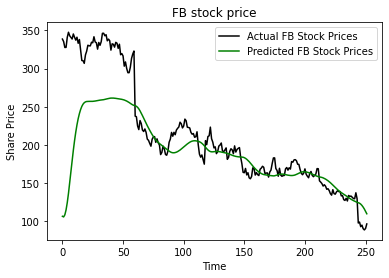

In [32]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Stock Prices")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Stock Prices")
plt.title(f"{company} stock price")
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.legend()
plt.show()